In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Import Library

In [2]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import statsmodels.api as sm
from scipy import stats


# Load & Cleaning Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Gcolab/nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [6]:
df["BOROUGH"] = df["BOROUGH"].replace({1:"Manhattan", 2:"Bronx", 3:"Brooklyn", 4:"Queens", 5:"Staten Island"})

In [7]:
# Ubah tipe data
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [8]:
# Ubah tipe data objek menjadi datetime
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])
df["SALE MONTH"] = pd.DatetimeIndex(df["SALE DATE"]).month
df["SALE YEAR"] = pd.DatetimeIndex(df["SALE DATE"]).year
df


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,7,2017
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,12,2016
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,12,2016
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,9,2016
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,11,2016
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,4,2017
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,7,2017
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,12,2016


**Cleaning**


In [9]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
SALE MONTH                            0
SALE YEAR                             0
dtype: int64

In [10]:
sum(df.duplicated())

0

In [12]:
# Missing Value pada kolom “LAND SQUARE FEET”
df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].mean(), inplace = True)

# Missing Value pada kolom "GROSS SQUARE FEET"
df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].mean(), inplace = True)
df = df[df["SALE PRICE"] != 0]
df.dropna(subset=["SALE PRICE"], inplace=True)

<ipython-input-12-4897b2604000>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].mean(), inplace = True)
<ipython-input-12-4897b2604000>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].mean(), inplace = True)


In [13]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
SALE MONTH                        0
SALE YEAR                         0
dtype: int64

# Mean

In [14]:
mean_manhattan = statistics.mean(df[df['BOROUGH'] == 'Manhattan']['SALE PRICE'])
mean_bronx = statistics.mean(df[df['BOROUGH'] == 'Bronx']['SALE PRICE'])
mean_brooklyn = statistics.mean(df[df['BOROUGH'] == 'Brooklyn']['SALE PRICE'])
mean_queens = statistics.mean(df[df['BOROUGH'] == 'Queens']['SALE PRICE'])
mean_staten_island = statistics.mean(df[df['BOROUGH'] == 'Staten Island']['SALE PRICE'])
print("Mean dari harga penjualan di wilayah Manhattan : ", "{:.2f}".format(mean_manhattan))
print("Mean dari harga penjualan di wilayah Bronx : ", "{:.2f}".format(mean_bronx))
print("Mean dari harga penjualan di wilayah Brooklyn: ", "{:.2f}".format(mean_brooklyn))
print("Mean dari harga penjualan di wilayah Queens: ", "{:.2f}".format(mean_queens))
print("Mean dari harga penjualan di wilayah Staten Island: ", "{:.2f}".format(mean_staten_island))

Mean dari harga penjualan di wilayah Manhattan :  3337951.27
Mean dari harga penjualan di wilayah Bronx :  803452.10
Mean dari harga penjualan di wilayah Brooklyn:  1278963.79
Mean dari harga penjualan di wilayah Queens:  739908.62
Mean dari harga penjualan di wilayah Staten Island:  543472.11


In [15]:
median_saleprice = df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
median_saleprice


,SALE PRICE
TAX CLASS AT PRESENT,
,999000.0
1,578000.0
1A,380000.0
1B,305000.0
1C,958668.0
2,660000.0
2A,1170000.0
2B,2200000.0
2C,870000.0


# Modus

In [16]:
mode_borough            = statistics.mode(df['BOROUGH'])
mode_Neighborhood       = statistics.mode(df['NEIGHBORHOOD'])
mode_BuildClassCategory = statistics.mode(df['BUILDING CLASS CATEGORY'])
print("Modus dari Borough                 :", mode_borough)
print("Modus dari Neighborhood            :", mode_Neighborhood)
print("Modus dari Building Class Category :", mode_BuildClassCategory )

Modus dari Borough                 : Queens
Modus dari Neighborhood            : FLUSHING-NORTH
Modus dari Building Class Category : 01 ONE FAMILY DWELLINGS                    


# Range

In [17]:
range_gross_square_feet = np.ptp(df['GROSS SQUARE FEET'])
range_land_square_feet = np.ptp(df['LAND SQUARE FEET'])
print(f"Nilai Min Gross Square Feet : {df['GROSS SQUARE FEET'].min()}")
print(f"Nilai Max Gross Square Feet : {df['GROSS SQUARE FEET'].max()}")
print(f"Nilai Min Land Square Feet : {df['LAND SQUARE FEET'].min()}")
print(f"Nilai Max Land Square Feet : {df['LAND SQUARE FEET'].max()}")
print("Range dari Gross Square Feet :", range_gross_square_feet)
print("Range dari Land Square Feet  :", range_land_square_feet)

Nilai Min Gross Square Feet : 0.0
Nilai Max Gross Square Feet : 3750565.0
Nilai Min Land Square Feet : 0.0
Nilai Max Land Square Feet : 4252327.0
Range dari Gross Square Feet : 3750565.0
Range dari Land Square Feet  : 4252327.0


# Variance

In [18]:
var_totalunit = statistics.variance(df['TOTAL UNITS'])
var_saleprice = statistics.variance(df['SALE PRICE'])
var_land_square_feet = statistics.variance(df['LAND SQUARE FEET'])
var_gross_square_feet = statistics.variance(df['GROSS SQUARE FEET'])
print("varian dari Total Units       : ", var_totalunit)
print("varian dari Sale Price        : ", var_saleprice)
print("Varian dari Land Square Feet  : ", var_land_square_feet)
print("Varian dari Gross Square Feet : ", var_gross_square_feet)

varian dari Total Units       :  300.59821928710977
varian dari Sale Price        :  152017322853219.0
Varian dari Land Square Feet  :  1308276643.8156579
Varian dari Gross Square Feet :  575699617.3772492


# Standard Deviation

In [19]:
std_saleprice = statistics.stdev(df['SALE PRICE'])
std_land_square_feet = statistics.stdev(df['LAND SQUARE FEET'])
std_gross_square_feet = statistics.stdev(df['GROSS SQUARE FEET'])
print("Standar Deviasi dari Sale Price        : ", std_saleprice)
print("Standar Deviasi dari Land Square Feet  : ", std_land_square_feet)
print("Standar Deviasi dari Gross Square Feet : ", std_gross_square_feet)

Standar Deviasi dari Sale Price        :  12329530.520389615
Standar Deviasi dari Land Square Feet  :  36170.10704733479
Standar Deviasi dari Gross Square Feet :  23993.741212600617


<ipython-input-20-a8b057af0a56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["SALE PRICE"], kde = True, color = "#0B5E84", hist_kws={"linewidth":20, "alpha":0.6})


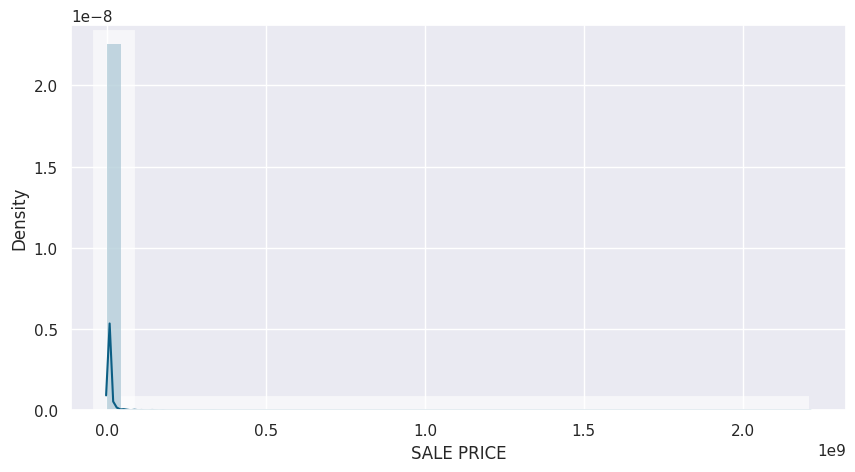

In [20]:
sns.set(color_codes = True)
sns.set(rc = {"figure.figsize":(10,5)})
ax = sns.distplot(df["SALE PRICE"], kde = True, color = "#0B5E84", hist_kws={"linewidth":20, "alpha":0.6})

<ipython-input-21-3dc9620815a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_sale_price, bins=100, kde=True, rug=True, color="#0B5E84")


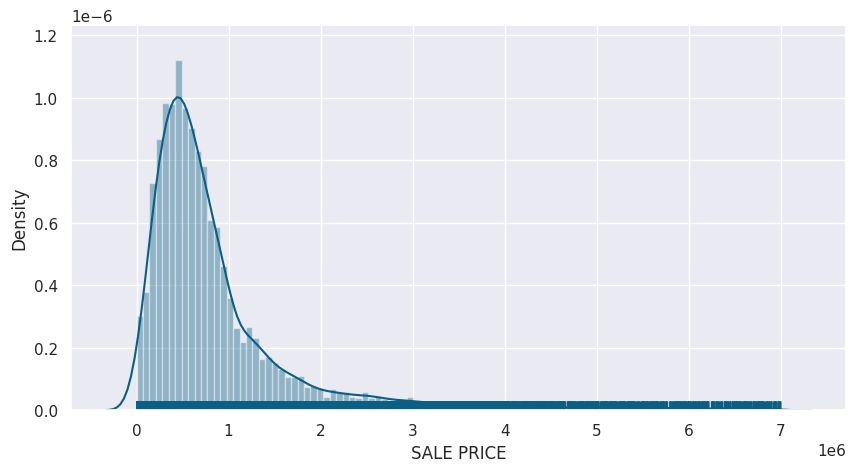

In [21]:
data_sale_price = df[(df["SALE PRICE"] > 100) & (df["SALE PRICE"] < 7000000)]["SALE PRICE"]
ax = sns.distplot(data_sale_price, bins=100, kde=True, rug=True, color="#0B5E84")

# Confidence Intervals

In [22]:
df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          8.034521e+05  3.220757e+06   5178
Brooklyn       1.278964e+06  4.813882e+06  15690
Manhattan      3.337951e+06  2.409778e+07  14439
Queens         7.399086e+05  3.233884e+06  18441
Staten Island  5.434721e+05  1.901766e+06   6011

In [23]:
# Queens

mean_queens = 739908.62   #Mean Sale Price dari queens
sd = 3233883.56      #Standard deviation dari Queens
n = 18441            #Total dari Queens
z = 1.96

In [24]:
#menghitung standard error dengan formula standard error dari mean
se = sd / np.sqrt(n)
se

23813.988777056988

In [25]:
lcb = mean_queens - z* se #Batas bawah
ucb = mean_queens + z* se #batas atas
print("Confidence Intervals adalah {} dan {}".format(lcb, ucb))

Confidence Intervals adalah 693233.2019969684 dan 786584.0380030316


# Hypothesis Testing

In [26]:
s = df[df['BOROUGH'] == 'Manhattan']['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(s)
print('stat=%.5f, p=%.5f' % (stat, p))

stat=0.05470, p=0.00000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
